final

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Загрузка данных
data = pd.read_csv('online_retail.csv', encoding='ISO-8859-1')

# Быстрый просмотр данных
print(data.head())
print(data.info())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       ------------

In [2]:
# Удаление строк с пустыми значениями
data = data.dropna()

# Кодирование категориальных переменных
label_encoder = LabelEncoder()
if 'CustomerID' in data.columns:
    data['CustomerID'] = label_encoder.fit_transform(data['CustomerID'])

# Преобразование данных о транзакциях
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Фильтрация данных (например, удаление возвратов)
data = data[data['Quantity'] > 0]


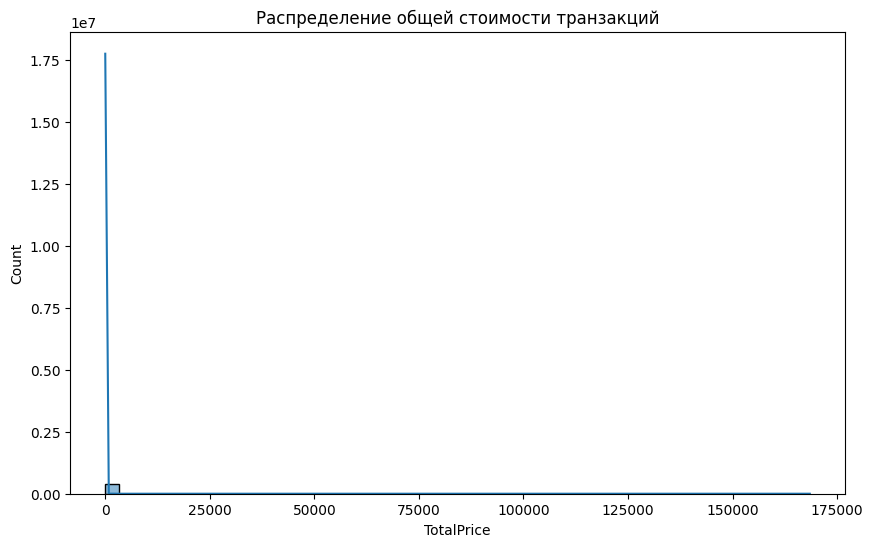

C:\Users\aresm\AppData\Local\Temp\ipykernel_15632\2706008466.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('InvoiceDate').resample('M')['TotalPrice'].sum().plot()


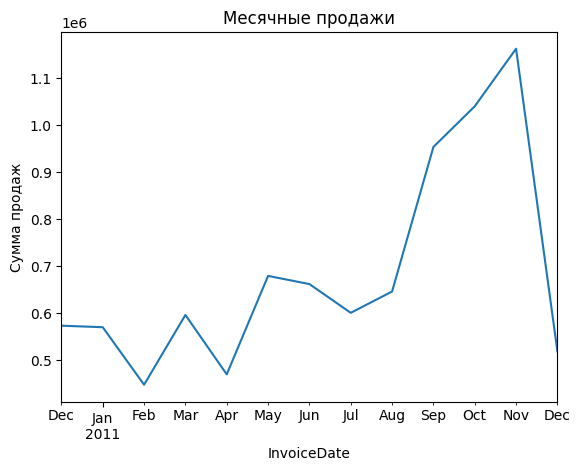

In [3]:
# Распределение покупок
plt.figure(figsize=(10, 6))
sns.histplot(data['TotalPrice'], bins=50, kde=True)
plt.title('Распределение общей стоимости транзакций')
plt.show()

# Тренды продаж во времени
data.set_index('InvoiceDate').resample('M')['TotalPrice'].sum().plot()
plt.title('Месячные продажи')
plt.ylabel('Сумма продаж')
plt.show()


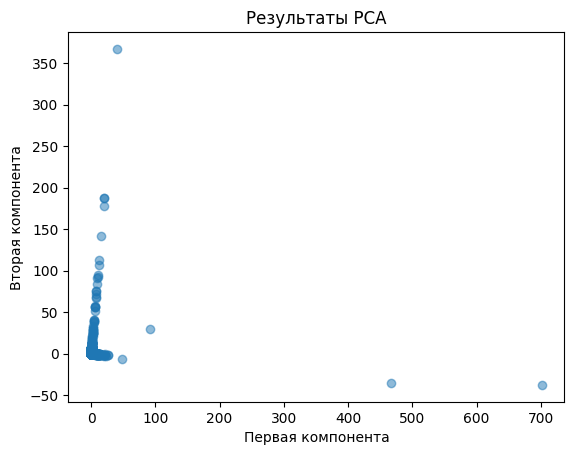

In [4]:
# Выбор признаков для анализа
features = ['Quantity', 'UnitPrice', 'TotalPrice']
X = data[features]

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA для уменьшения размерности
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('Результаты PCA')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.show()


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Пример генерации меток для классификации
data['HighSpender'] = data['TotalPrice'] > data['TotalPrice'].median()

# Разделение данных
X = X_scaled
y = data['HighSpender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     39898
        True       1.00      1.00      1.00     39687

    accuracy                           1.00     79585
   macro avg       1.00      1.00      1.00     79585
weighted avg       1.00      1.00      1.00     79585

